# Import Necessary Libraries

In [ ]:
import numpy as np
import keras
from keras.models import Sequential
from keras.layers import Dense,Conv2D,MaxPool2D,Dropout,BatchNormalization,Flatten,Activation
from keras.preprocessing import image 
from keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt

# Directories of the datasets


In [ ]:
train_directory='../input/100-bird-species/train'
val_directory='../input/100-bird-species/valid'
test_directory='../input/100-bird-species/test'

# Rescale the Images

In [ ]:
train_datagen=ImageDataGenerator(rescale=1/255)
val_datagen=ImageDataGenerator(rescale=1/255)
test_datagen=ImageDataGenerator(rescale=1/255)

# Use the flow from directory for reading the images

In [ ]:
train_generator=train_datagen.flow_from_directory(train_directory,
                                                 target_size=(224,224),
                                                 color_mode='rgb',
                                                  batch_size=256,
                                                 class_mode='sparse')
val_generator=val_datagen.flow_from_directory(val_directory,
                                                 target_size=(224,224),
                                                 batch_size=256,
                                                 color_mode='rgb',
                                                 class_mode='sparse')
test_generator=test_datagen.flow_from_directory(test_directory,
                                                batch_size=256,
                                                 target_size=(224,224),
                                                 color_mode='rgb',
                                                 class_mode='sparse')

Found 31316 images belonging to 225 classes.
Found 1125 images belonging to 225 classes.
Found 1125 images belonging to 225 classes.


# The Dictionary

In [ ]:
print(len(train_generator.class_indices))

225


In [ ]:
train_generator.class_indices

{'AFRICAN FIREFINCH': 0,
 'ALBATROSS': 1,
 'ALEXANDRINE PARAKEET': 2,
 'AMERICAN AVOCET': 3,
 'AMERICAN BITTERN': 4,
 'AMERICAN COOT': 5,
 'AMERICAN GOLDFINCH': 6,
 'AMERICAN KESTREL': 7,
 'AMERICAN PIPIT': 8,
 'AMERICAN REDSTART': 9,
 'ANHINGA': 10,
 'ANNAS HUMMINGBIRD': 11,
 'ANTBIRD': 12,
 'ARARIPE MANAKIN': 13,
 'ASIAN CRESTED IBIS': 14,
 'BALD EAGLE': 15,
 'BALI STARLING': 16,
 'BALTIMORE ORIOLE': 17,
 'BANANAQUIT': 18,
 'BAR-TAILED GODWIT': 19,
 'BARN OWL': 20,
 'BARN SWALLOW': 21,
 'BARRED PUFFBIRD': 22,
 'BAY-BREASTED WARBLER': 23,
 'BEARDED BARBET': 24,
 'BELTED KINGFISHER': 25,
 'BIRD OF PARADISE': 26,
 'BLACK FRANCOLIN': 27,
 'BLACK SKIMMER': 28,
 'BLACK SWAN': 29,
 'BLACK THROATED WARBLER': 30,
 'BLACK VULTURE': 31,
 'BLACK-CAPPED CHICKADEE': 32,
 'BLACK-NECKED GREBE': 33,
 'BLACK-THROATED SPARROW': 34,
 'BLACKBURNIAM WARBLER': 35,
 'BLUE GROUSE': 36,
 'BLUE HERON': 37,
 'BOBOLINK': 38,
 'BROWN NOODY': 39,
 'BROWN THRASHER': 40,
 'CACTUS WREN': 41,
 'CALIFORNIA CONDOR': 42,

# We are using Resnet50v2 with imagenet weights

In [ ]:
from keras.applications import ResNet50V2

In [ ]:
convlayer=ResNet50V2(input_shape=(224,224,3),weights='imagenet',include_top=False)
for layer in convlayer.layers:
    layer.trainable=False

94674944/94668760 [==============================] - 1s 0us/step


In [ ]:
convlayer.summary()

Model: "resnet50v2"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
pool1_pad (ZeroPadding2D)       (None, 114, 114, 64) 0           conv1_conv[0][0]                 
_________________________________________________________________________________________

# Adding the layer to the Dense Layers

In [ ]:
model=Sequential()
model.add(convlayer)
model.add(Dropout(0.5))
model.add(Flatten())
model.add(BatchNormalization())
model.add(Dense(2048,kernel_initializer='he_uniform'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(1024,kernel_initializer='he_uniform'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes,activation='softmax',kernel_initializer='glorot_uniform'))
print(model.summary())

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
resnet50v2 (Functional)      (None, 7, 7, 2048)        23564800  
_________________________________________________________________
dropout_3 (Dropout)          (None, 7, 7, 2048)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 100352)            0         
_________________________________________________________________
batch_normalization_4 (Batch (None, 100352)            401408    
_________________________________________________________________
dense_4 (Dense)              (None, 2048)              205522944 
_________________________________________________________________
batch_normalization_5 (Batch (None, 2048)              8192      
_________________________________________________________________
activation_3 (Activation)    (None, 2048)             

# Use a small learning rate for better accuracy

In [ ]:
optimizer=keras.optimizers.RMSprop(lr=0.0001)
model.compile(optimizer=optimizer,loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [ ]:
history=model.fit(train_generator,epochs=7,validation_data=val_generator)

Epoch 1/7
123/123 [==============================] - 143s 1s/step - loss: 3.9970 - accuracy: 0.2387 - val_loss: 1.4244 - val_accuracy: 0.7573
Epoch 2/7
123/123 [==============================] - 102s 826ms/step - loss: 1.8457 - accuracy: 0.6511 - val_loss: 0.8019 - val_accuracy: 0.8782
Epoch 3/7
123/123 [==============================] - 101s 823ms/step - loss: 0.9989 - accuracy: 0.8258 - val_loss: 0.5330 - val_accuracy: 0.9129
Epoch 4/7
123/123 [==============================] - 102s 830ms/step - loss: 0.5704 - accuracy: 0.9088 - val_loss: 0.4040 - val_accuracy: 0.9369
Epoch 5/7
123/123 [==============================] - 102s 828ms/step - loss: 0.3344 - accuracy: 0.9525 - val_loss: 0.3218 - val_accuracy: 0.9413
Epoch 6/7
123/123 [==============================] - 101s 823ms/step - loss: 0.1945 - accuracy: 0.9758 - val_loss: 0.2726 - val_accuracy: 0.9502
Epoch 7/7
123/123 [==============================] - 102s 830ms/step - loss: 0.1183 - accuracy: 0.9870 - val_loss: 0.2419 - val_accur

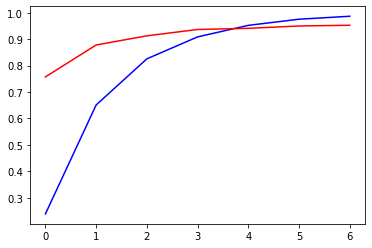

In [ ]:
plt.plot(history.history['accuracy'],c='b')
plt.plot(history.history['val_accuracy'],c='r')
plt.show()

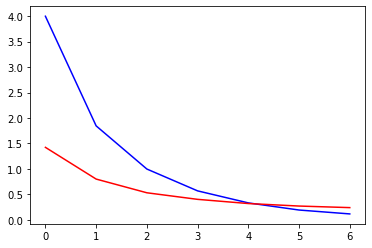

In [ ]:
plt.plot(history.history['loss'],c='b')
plt.plot(history.history['val_loss'],c='r')
plt.show()

# Check your Accuracy on the Test set

In [ ]:
model.evaluate(test_generator)

5/5 [==============================] - 4s 742ms/step - loss: 0.1943 - accuracy: 0.9644


[0.19432726502418518, 0.9644444584846497]

# Train for two more Epochs

In [ ]:
history=model.fit(train_generator,epochs=2,validation_data=val_generator)

Epoch 1/2
123/123 [==============================] - 102s 833ms/step - loss: 0.0728 - accuracy: 0.9935 - val_loss: 0.2229 - val_accuracy: 0.9564
Epoch 2/2
123/123 [==============================] - 102s 826ms/step - loss: 0.0474 - accuracy: 0.9963 - val_loss: 0.2133 - val_accuracy: 0.9547


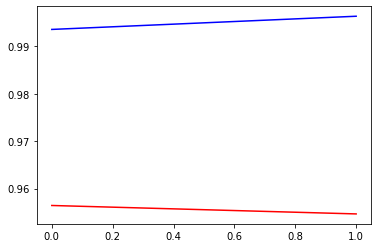

In [ ]:
plt.plot(history.history['accuracy'],c='b')
plt.plot(history.history['val_accuracy'],c='r')
plt.show()

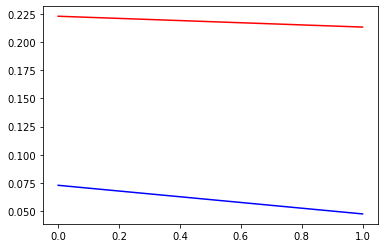

In [ ]:
plt.plot(history.history['loss'],c='b')
plt.plot(history.history['val_loss'],c='r')
plt.show()

In [ ]:
model.evaluate(test_generator)

5/5 [==============================] - 3s 521ms/step - loss: 0.1553 - accuracy: 0.9716


[0.1553153097629547, 0.9715555310249329]

# Check for Your Own Image

In [ ]:
def predict(dir):
    img=image.load_img(dir,target_size=(224,224))
    img1=image.img_to_array(img)
    img1=img1/255
    img1=np.expand_dims(img1,[0])
    plt.imshow(img)
    pred=int((model.predict_classes(img1)))
    for key,values in train_generator.class_indices.items():
        if pred==values:
            print("The predicted image of the bird is: "+str(key)+" with a probability of "+str(round(np.max(model.predict_proba(img1))*100,2))+"%")
    
    

# Example1

The predicted image of the bird is: BANANAQUIT with a probability of 95.23%


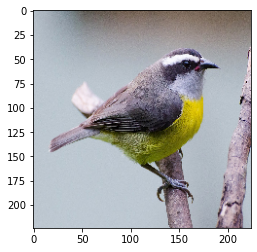

In [ ]:
predict('../input/ihaijaiaiog/242624121.jpg')

# Example2

The predicted image of the bird is: ANTBIRD with a probability of 60.66%


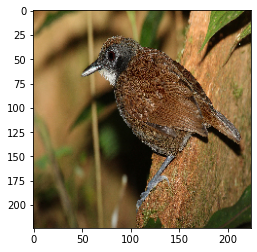

In [ ]:
predict('../input/bird-data/antbird.jpg')

# Example 3

The predicted image of the bird is: KOOKABURRA with a probability of 65.45%


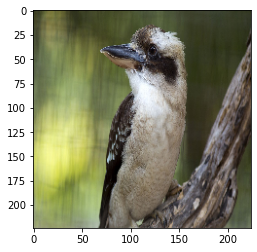

In [ ]:
predict('../input/kookaburra/Laughing-Kookaburra_Patrick-Rolands.jpg')